# Read information from data

### read informarion 1 (non Trigger point)

In [33]:
import pyxdf

# recieve file .xdf
streams, header = pyxdf.load_xdf('sub-P001\ses-S001\eeg\sub-P001_ses-S001_task-Default_run-001_eeg.xdf')
# pull stream 1 (EMG)
print("\n\n")
stream_emg = streams[0]
print("EMG Stream Name:", stream_emg['info']['name'][0])
print("EMG Stream Type:", stream_emg['info']['type'][0])
print("EMG Sampling Rate:", stream_emg['info']['nominal_srate'][0])
print("EMG Time Series Shape:", stream_emg['time_series'].shape)
print("EMG Time Stamps Shape:", len(stream_emg['time_stamps']))
# pull stream 2 (TimeSeries RAW_Time)
print(" ")
stream_raw_time = streams[1]
print("TimeSeries RAW Stream Name:", stream_raw_time['info']['name'][0])
print("TimeSeries RAW Stream Type:", stream_raw_time['info']['type'][0])
print("TimeSeries RAW Sampling Rate:", stream_raw_time['info']['nominal_srate'][0])
print("TimeSeries RAW Time Series Shape:", stream_raw_time['time_series'].shape)
print("TimeSeries RAW Time Stamps Shape:", len(stream_raw_time['time_stamps']))
# pull stream 3 (Marker)
print(" ")
stream_marker = streams[2]
print("Marker Stream Name:", stream_marker['info']['name'][0])
print("Marker Stream Type:", stream_marker['info']['type'][0])
print("Marker Sampling Rate:", stream_marker['info']['nominal_srate'][0])
print("Marker Time Series Shape:", stream_marker['time_series'].shape)
print("Marker Time Stamps Shape:", len(stream_marker['time_stamps']))


<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\STUDENT\AppData\Local\Temp\ipykernel_11316\738266340.py:4: SyntaxWarning: invalid escape sequence '\s'
  streams, header = pyxdf.load_xdf('sub-P001\ses-S001\eeg\sub-P001_ses-S001_task-Default_run-001_eeg.xdf')
Stream 3: Calculated effective sampling rate 119.4722 Hz is different from specified rate 250.0000 Hz.





EMG Stream Name: obci_EMG
EMG Stream Type: EMG
EMG Sampling Rate: 250
EMG Time Series Shape: (35637, 8)
EMG Time Stamps Shape: 35637
 
TimeSeries RAW Stream Name: obci_Flit
TimeSeries RAW Stream Type: EMG
TimeSeries RAW Sampling Rate: 250
TimeSeries RAW Time Series Shape: (74600, 8)
TimeSeries RAW Time Stamps Shape: 74600
 
Marker Stream Name: obci_RAW 
Marker Stream Type: EMG
Marker Sampling Rate: 250
Marker Time Series Shape: (74600, 1)
Marker Time Stamps Shape: 74600


### plot graph signal stream 0-2

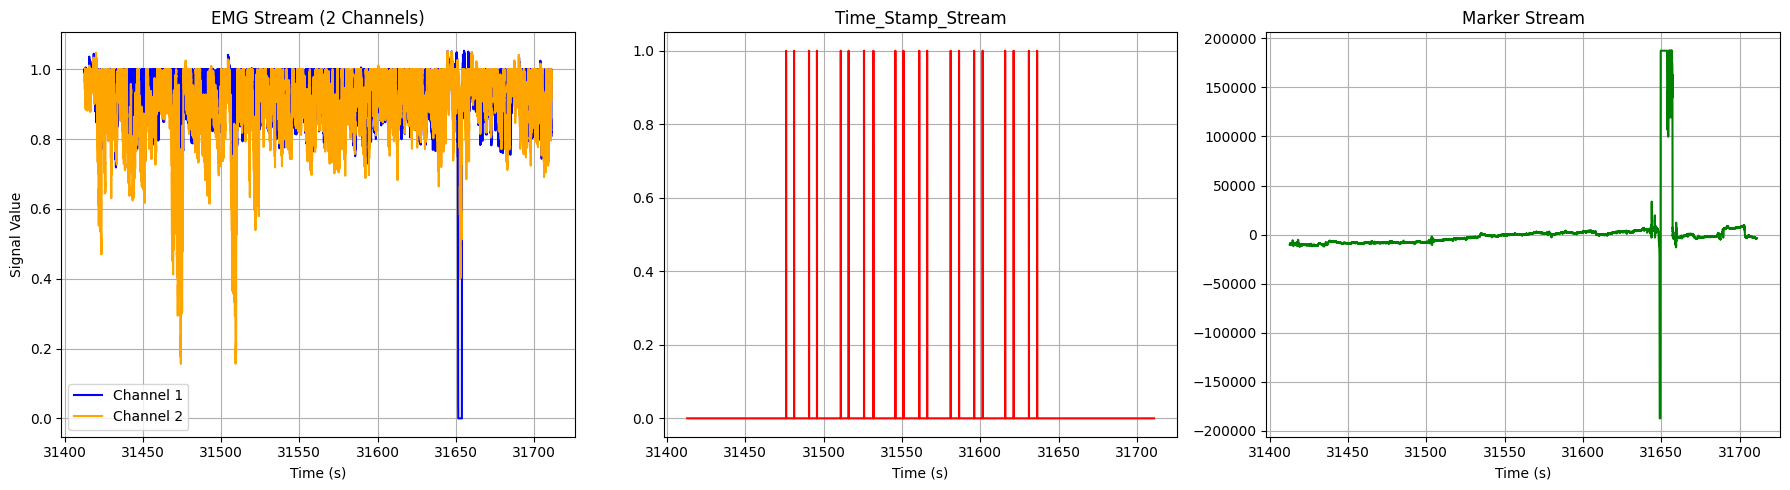

In [34]:
import matplotlib.pyplot as plt

# Stream 0
stream_emg = streams[0]  
time_stamps_EMG = stream_emg["time_stamps"]
time_series_EMG_ch1 = stream_emg["time_series"][:, 0] 
time_series_EMG_ch2 = stream_emg["time_series"][:, 2] 

fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=False)

axs[0].plot(time_stamps_EMG, time_series_EMG_ch1, label="Channel 1", color="blue")
axs[0].plot(time_stamps_EMG, time_series_EMG_ch2, label="Channel 2", color="orange")
axs[0].set_title("EMG Stream (2 Channels)")
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Signal Value")
axs[0].legend()
axs[0].grid()

# Stream 1
stream_marker = streams[1] 
time_stamps_Marker = stream_marker["time_stamps"]
time_series_Marker = stream_marker["time_series"][:, 0]  
axs[2].plot(time_stamps_Marker, time_series_Marker, color="green")
axs[2].set_title("Marker Stream")
axs[2].set_xlabel("Time (s)")
axs[2].grid()

# Stream 2
stream_raw_time = streams[2]
time_stamps_Raw_time = stream_raw_time["time_stamps"]
time_series_Raw_time = stream_raw_time["time_series"][:, 0]  
axs[1].plot(time_stamps_Raw_time, time_series_Raw_time, color="red")
axs[1].set_title("Time_Stamp_Stream")
axs[1].set_xlabel("Time (s)")
axs[1].grid()

plt.tight_layout()
plt.show()

### find marker point

In [35]:
import numpy as np

stream_marker = streams[2] 
time_stamps_Marker = stream_marker["time_stamps"]
time_series_Marker = stream_marker["time_series"][:, 0] 

## find point as delta (    +-5)
marker_on_indices = np.where(time_series_Marker == 1)[0]
print(marker_on_indices)
marker_on_timestamps = time_stamps_Marker[marker_on_indices] 
print(marker_on_timestamps)

## result = answer (delta   +-5)
results = [] 
for i, idx in enumerate(marker_on_indices[:-1]): 
    current_time = time_stamps_Marker[idx] 
    next_time = time_stamps_Marker[marker_on_indices[i + 1]]  
    
    if 0 < next_time - current_time <= 8:
        results.append((current_time, next_time)) 

print("ช่วงเวลาที่มี Marker ใหม่ภายใน 5 วินาที:")
for start, end in results:
    delta = end - start
    print(f"Marker ที่ {start:.2f} วินาที -> Marker ที่ {end:.2f} วินาที ต่างกันอยู่ {delta:.2f}  วินาที")

[15800 17074 19465 20735 24540 25795 28250 29754 33262 34558 37077 38336
 42097 43433 45845 47207 50801 52160 54599 55908]
[31476.03329973 31481.12286219 31490.67478045 31495.74836313
 31510.94913644 31515.96279492 31525.77038978 31531.77879006
 31545.79306411 31550.97051542 31561.03378689 31566.06342515
 31581.08842079 31586.42566998 31596.06148212 31601.50259993
 31615.86043942 31621.28957238 31631.0332481  31636.26263371]
ช่วงเวลาที่มี Marker ใหม่ภายใน 5 วินาที:
Marker ที่ 31476.03 วินาที -> Marker ที่ 31481.12 วินาที ต่างกันอยู่ 5.09  วินาที
Marker ที่ 31490.67 วินาที -> Marker ที่ 31495.75 วินาที ต่างกันอยู่ 5.07  วินาที
Marker ที่ 31510.95 วินาที -> Marker ที่ 31515.96 วินาที ต่างกันอยู่ 5.01  วินาที
Marker ที่ 31525.77 วินาที -> Marker ที่ 31531.78 วินาที ต่างกันอยู่ 6.01  วินาที
Marker ที่ 31545.79 วินาที -> Marker ที่ 31550.97 วินาที ต่างกันอยู่ 5.18  วินาที
Marker ที่ 31561.03 วินาที -> Marker ที่ 31566.06 วินาที ต่างกันอยู่ 5.03  วินาที
Marker ที่ 31581.09 วินาที -> Marker ท

### plotgraph marker point

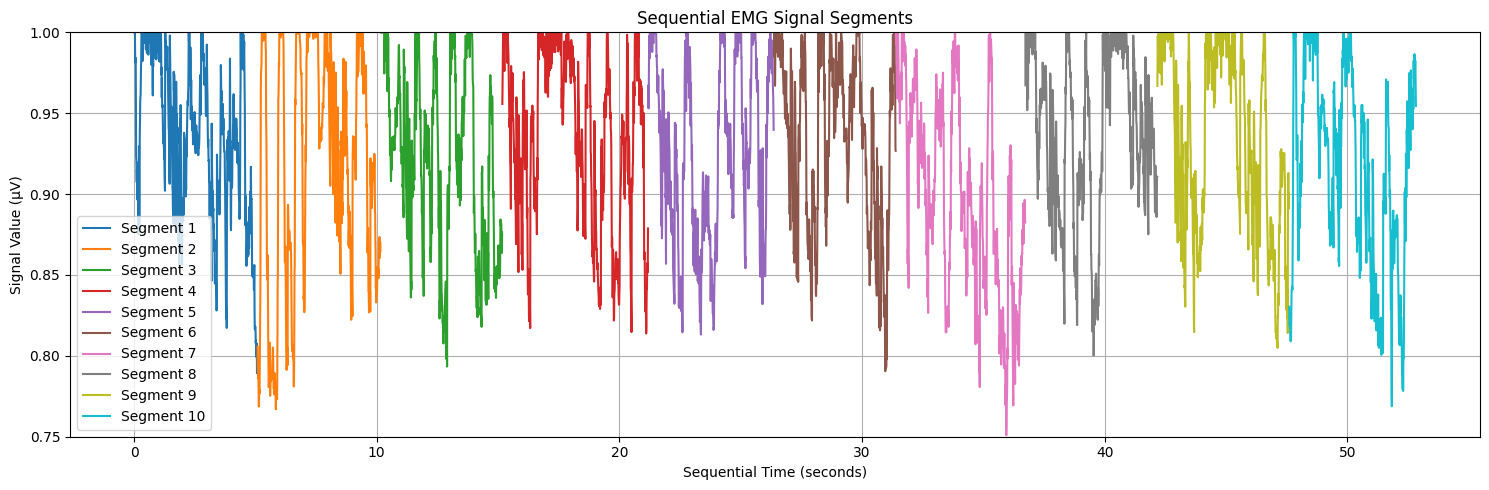

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Select the relevant streams (assume streams are already defined)
stream_emg = streams[0]  # EMG data
time_stamps_EMG = stream_emg["time_stamps"]
time_series_EMG = stream_emg["time_series"][:, 0]  # Use the first channel

stream_marker = streams[2]  # Marker data
time_stamps_Marker = stream_marker["time_stamps"]
time_series_Marker = stream_marker["time_series"][:, 0]  # Marker channel

# Find indices where Marker = 1
marker_on_indices = np.where(time_series_Marker == 1)[0]
marker_on_timestamps = time_stamps_Marker[marker_on_indices]

# Gather segments based on marker timing
results = []
for i, idx in enumerate(marker_on_indices[:-1]):
    current_time = time_stamps_Marker[idx]
    next_time = time_stamps_Marker[marker_on_indices[i + 1]]

    if 0 < next_time - current_time <= 8:  # Check if within a valid time range
        results.append((current_time, next_time))

# Create a single wide plot
plt.figure(figsize=(15, 5))  # Adjust width and height as needed

# Initialize an offset for aligning segments sequentially
offset = 0

# Loop through each segment and plot
for i, (start, end) in enumerate(results):
    # Filter data within the segment's time range
    segment_indices = np.where((time_stamps_EMG >= start) & (time_stamps_EMG <= end))
    segment_time = time_stamps_EMG[segment_indices]
    segment_signal = time_series_EMG[segment_indices]

    # Adjust the time stamps to align segments sequentially
    adjusted_time = segment_time - start + offset

    # Plot the data for the segment
    plt.plot(adjusted_time, segment_signal, label=f"Segment {i + 1}")

    # Update the offset for the next segment
    offset += end - start

# Add title and labels for the wide plot
plt.ylim(0.75, 1)  # Adjust the y-axis limits as needed
plt.title("Sequential EMG Signal Segments")
plt.xlabel("Sequential Time (seconds)")
plt.ylabel("Signal Value (μV)")  # Add units (microvolts)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


### read informarion 2 (Trigger point)

In [37]:
import pyxdf

# recieve file .xdf
streams, header = pyxdf.load_xdf('sub-P001\ses-S001\eeg\sub-P001_ses-S001_task-Default_run-001_eeg.xdf')
# pull stream 1 (EMG)
print("\n\n")
stream_emg = streams[0]
print("EMG Stream Name:", stream_emg['info']['name'][0])
print("EMG Stream Type:", stream_emg['info']['type'][0])
print("EMG Sampling Rate:", stream_emg['info']['nominal_srate'][0])
print("EMG Time Series Shape:", stream_emg['time_series'].shape)
print("EMG Time Stamps Shape:", len(stream_emg['time_stamps']))
# pull stream 2 (TimeSeries RAW_Time)
print(" ")
stream_raw_time = streams[1]
print("TimeSeries RAW Stream Name:", stream_raw_time['info']['name'][0])
print("TimeSeries RAW Stream Type:", stream_raw_time['info']['type'][0])
print("TimeSeries RAW Sampling Rate:", stream_raw_time['info']['nominal_srate'][0])
print("TimeSeries RAW Time Series Shape:", stream_raw_time['time_series'].shape)
print("TimeSeries RAW Time Stamps Shape:", len(stream_raw_time['time_stamps']))
# pull stream 3 (Marker)
print(" ")
stream_marker = streams[2]
print("Marker Stream Name:", stream_marker['info']['name'][0])
print("Marker Stream Type:", stream_marker['info']['type'][0])
print("Marker Sampling Rate:", stream_marker['info']['nominal_srate'][0])
print("Marker Time Series Shape:", stream_marker['time_series'].shape)
print("Marker Time Stamps Shape:", len(stream_marker['time_stamps']))


<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\STUDENT\AppData\Local\Temp\ipykernel_11316\738266340.py:4: SyntaxWarning: invalid escape sequence '\s'
  streams, header = pyxdf.load_xdf('sub-P001\ses-S001\eeg\sub-P001_ses-S001_task-Default_run-001_eeg.xdf')
Stream 3: Calculated effective sampling rate 119.4722 Hz is different from specified rate 250.0000 Hz.





EMG Stream Name: obci_EMG
EMG Stream Type: EMG
EMG Sampling Rate: 250
EMG Time Series Shape: (35637, 8)
EMG Time Stamps Shape: 35637
 
TimeSeries RAW Stream Name: obci_Flit
TimeSeries RAW Stream Type: EMG
TimeSeries RAW Sampling Rate: 250
TimeSeries RAW Time Series Shape: (74600, 8)
TimeSeries RAW Time Stamps Shape: 74600
 
Marker Stream Name: obci_RAW 
Marker Stream Type: EMG
Marker Sampling Rate: 250
Marker Time Series Shape: (74600, 1)
Marker Time Stamps Shape: 74600


# Plotgraph stream 0-2 (non Trigger point)

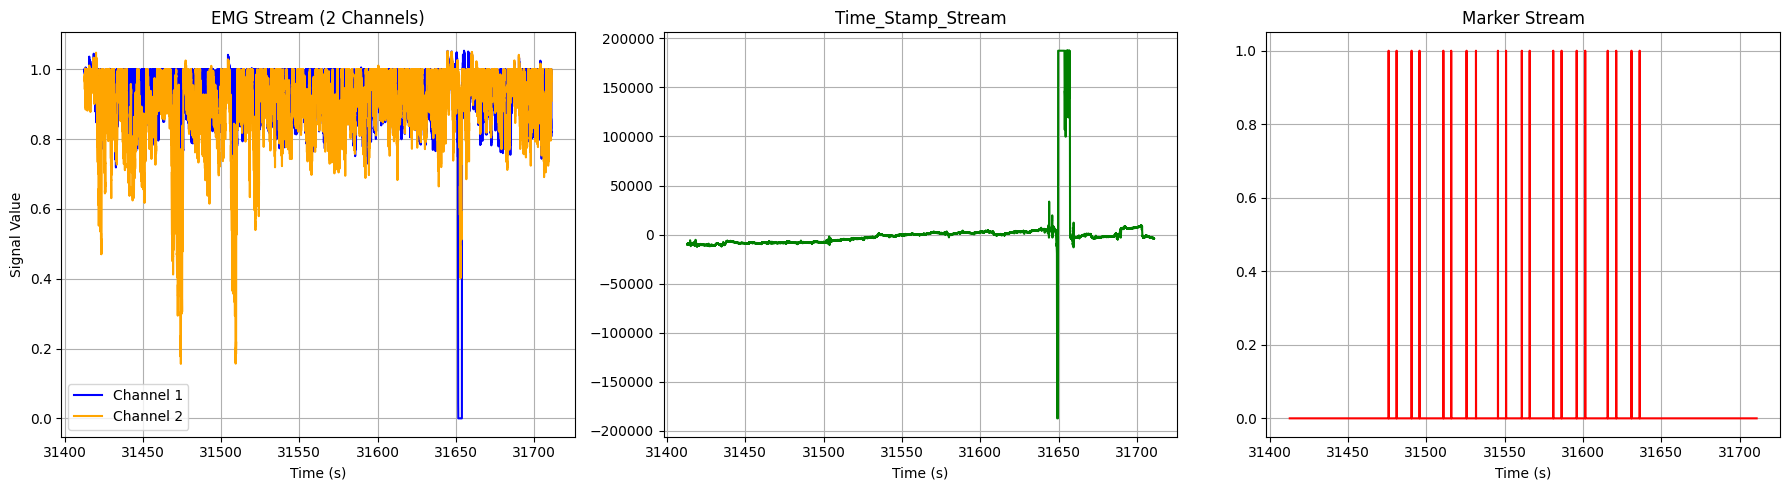

In [38]:
import matplotlib.pyplot as plt

# Stream 0
stream_emg = streams[0]  
time_stamps_EMG = stream_emg["time_stamps"]
time_series_EMG_ch1 = stream_emg["time_series"][:, 0] 
time_series_EMG_ch2 = stream_emg["time_series"][:, 2] 

fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=False)

axs[0].plot(time_stamps_EMG, time_series_EMG_ch1, label="Channel 1", color="blue")
axs[0].plot(time_stamps_EMG, time_series_EMG_ch2, label="Channel 2", color="orange")
axs[0].set_title("EMG Stream (2 Channels)")
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Signal Value")
axs[0].legend()
axs[0].grid()

# Stream 1
stream_raw_time = streams[1] 
time_stamps_raw_time = stream_raw_time["time_stamps"]
time_series_raw_time = stream_raw_time["time_series"][:, 0]  
axs[1].plot(time_stamps_raw_time, time_series_raw_time, color="green")
axs[1].set_title("Time_Stamp_Stream")
axs[1].set_xlabel("Time (s)")
axs[1].grid()

# Stream 2
stream_marker = streams[2]
time_stamps_Marker = stream_marker["time_stamps"]
time_series_Marker = stream_marker["time_series"][:, 0]  
axs[2].plot(time_stamps_Marker, time_series_Marker, color="red")
axs[2].set_title("Marker Stream")
axs[2].set_xlabel("Time (s)")
axs[2].grid()


plt.tight_layout()
plt.show()

### find marker point


In [39]:
import numpy as np

stream_marker = streams[2] 
time_stamps_Marker = stream_marker["time_stamps"]
time_series_Marker = stream_marker["time_series"][:, 0] 

## find point as delta (    +-5)
marker_on_indices = np.where(time_series_Marker == 1)[0]
print(marker_on_indices)
marker_on_timestamps = time_stamps_Marker[marker_on_indices] 
print(marker_on_timestamps)

## result = answer (delta   +-5)
results = [] 
for i, idx in enumerate(marker_on_indices[:-1]): 
    current_time = time_stamps_Marker[idx] 
    next_time = time_stamps_Marker[marker_on_indices[i + 1]]  
    
    if 0 < next_time - current_time <= 8:
        results.append((current_time, next_time)) 

print("ช่วงเวลาที่มี Marker ใหม่ภายใน 5 วินาที:")
for start, end in results:
    delta = end - start
    print(f"Marker ที่ {start:.2f} วินาที -> Marker ที่ {end:.2f} วินาที ต่างกันอยู่ {delta:.2f}  วินาที")


[15800 17074 19465 20735 24540 25795 28250 29754 33262 34558 37077 38336
 42097 43433 45845 47207 50801 52160 54599 55908]
[31476.03329973 31481.12286219 31490.67478045 31495.74836313
 31510.94913644 31515.96279492 31525.77038978 31531.77879006
 31545.79306411 31550.97051542 31561.03378689 31566.06342515
 31581.08842079 31586.42566998 31596.06148212 31601.50259993
 31615.86043942 31621.28957238 31631.0332481  31636.26263371]
ช่วงเวลาที่มี Marker ใหม่ภายใน 5 วินาที:
Marker ที่ 31476.03 วินาที -> Marker ที่ 31481.12 วินาที ต่างกันอยู่ 5.09  วินาที
Marker ที่ 31490.67 วินาที -> Marker ที่ 31495.75 วินาที ต่างกันอยู่ 5.07  วินาที
Marker ที่ 31510.95 วินาที -> Marker ที่ 31515.96 วินาที ต่างกันอยู่ 5.01  วินาที
Marker ที่ 31525.77 วินาที -> Marker ที่ 31531.78 วินาที ต่างกันอยู่ 6.01  วินาที
Marker ที่ 31545.79 วินาที -> Marker ที่ 31550.97 วินาที ต่างกันอยู่ 5.18  วินาที
Marker ที่ 31561.03 วินาที -> Marker ที่ 31566.06 วินาที ต่างกันอยู่ 5.03  วินาที
Marker ที่ 31581.09 วินาที -> Marker ท

### plotgraph marker

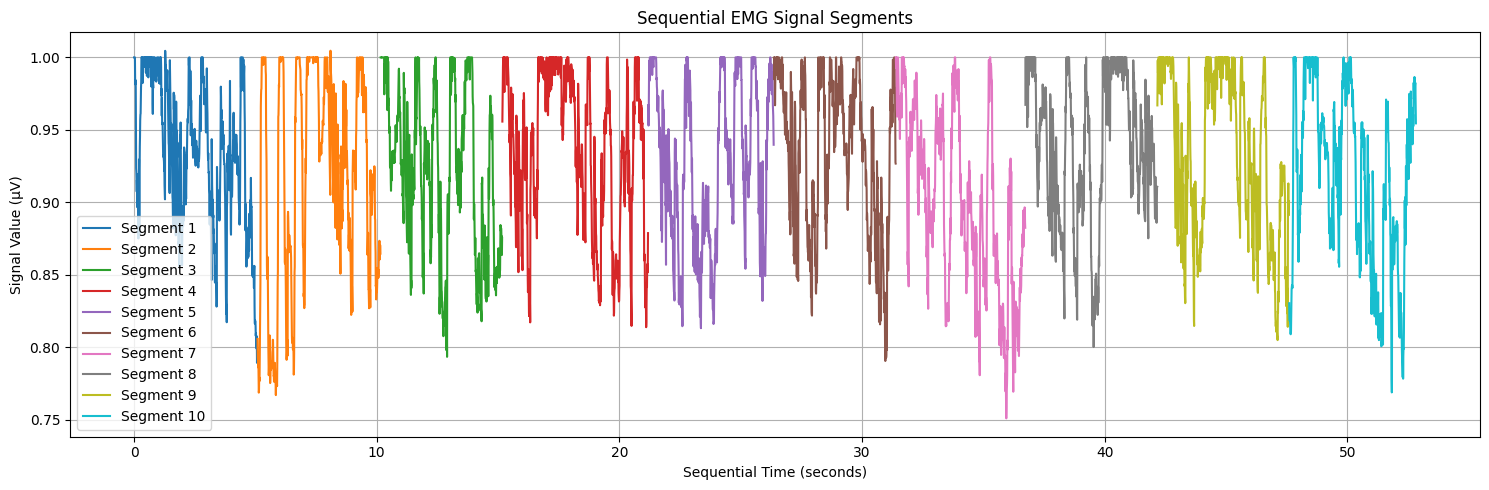

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Select the relevant streams (assume streams are already defined)
stream_emg = streams[0]  # EMG data
time_stamps_EMG = stream_emg["time_stamps"]
time_series_EMG = stream_emg["time_series"][:, 0]  # Use the first channel

stream_marker = streams[2]  # Marker data
time_stamps_Marker = stream_marker["time_stamps"]
time_series_Marker = stream_marker["time_series"][:, 0]  # Marker channel

# Find indices where Marker = 1
marker_on_indices = np.where(time_series_Marker == 1)[0]
marker_on_timestamps = time_stamps_Marker[marker_on_indices]

# Gather segments based on marker timing
results = []
for i, idx in enumerate(marker_on_indices[:-1]):
    current_time = time_stamps_Marker[idx]
    next_time = time_stamps_Marker[marker_on_indices[i + 1]]

    if 0 < next_time - current_time <= 8:  # Check if within a valid time range
        results.append((current_time, next_time))

# Create a single wide plot
plt.figure(figsize=(15, 5))  # Adjust width and height as needed

# Initialize an offset for aligning segments sequentially
offset = 0

# Loop through each segment and plot
for i, (start, end) in enumerate(results):
    # Filter data within the segment's time range
    segment_indices = np.where((time_stamps_EMG >= start) & (time_stamps_EMG <= end))
    segment_time = time_stamps_EMG[segment_indices]
    segment_signal = time_series_EMG[segment_indices]

    # Adjust the time stamps to align segments sequentially
    adjusted_time = segment_time - start + offset

    # Plot the data for the segment
    plt.plot(adjusted_time, segment_signal, label=f"Segment {i + 1}")

    # Update the offset for the next segment
    offset += end - start

# Add title and labels for the wide plot
plt.title("Sequential EMG Signal Segments")
plt.xlabel("Sequential Time (seconds)")
plt.ylabel("Signal Value (μV)")  # Add units (microvolts)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


# Filter marker
